In [2]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar dataset
df = pd.read_csv("datasets/samsung.csv")

#mostrar los primeros registros
df.head()


,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [3]:
#Preprocesamiento
# Convertir fecha a datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Seleccionar solo columnas numéricas para clustering
X = df[["Close", "Volume"]]

# Escalar los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


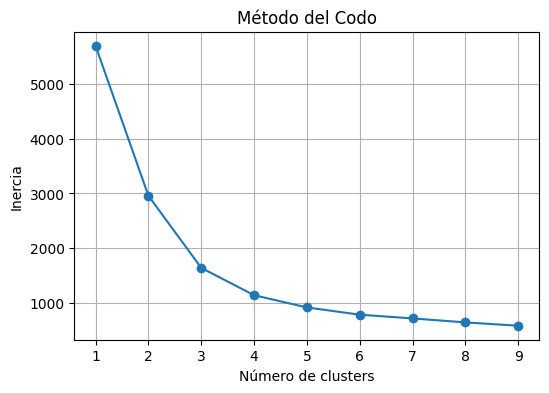

In [4]:
#Elbow Method(Para encontrar el número óptimo de clusters)
inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()


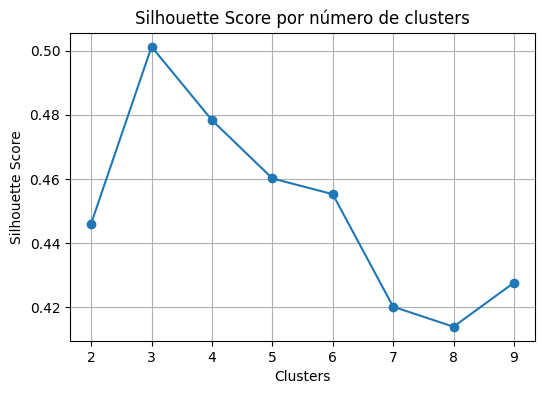

In [5]:
#Silhouette Score (segunda métrica de optimización)
sil = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    sil.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2,10), sil, marker='o')
plt.title("Silhouette Score por número de clusters")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [6]:
#Entrenamiento modelo final
k = 3
model = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = model.fit_predict(X_scaled)


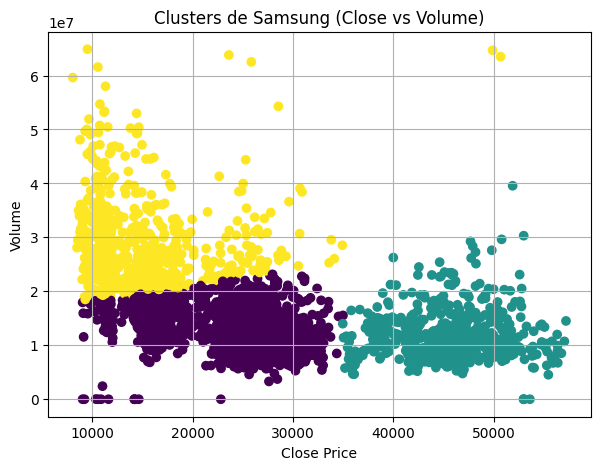

In [7]:
#Graficacion de los clusters
plt.figure(figsize=(7,5))
plt.scatter(df["Close"], df["Volume"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.title("Clusters de Samsung (Close vs Volume)")
plt.grid(True)
plt.show()


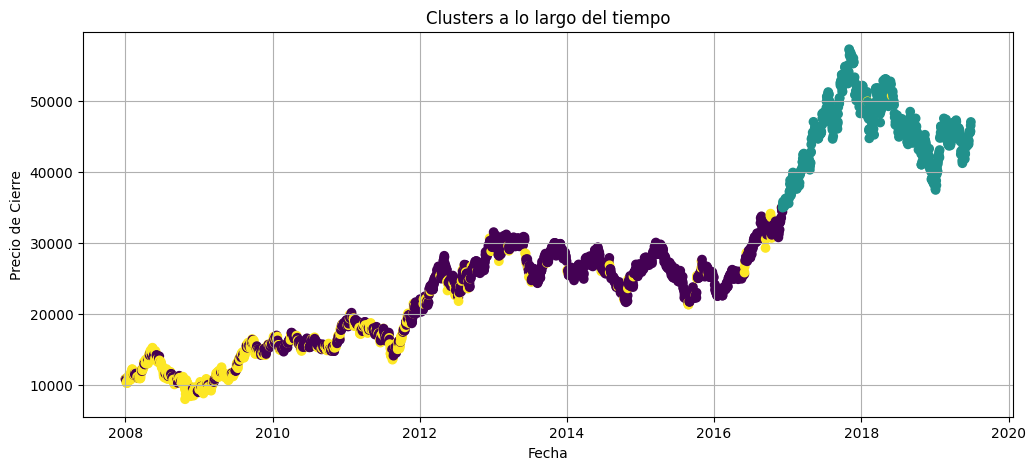

In [8]:
#Gráfica temporal de clusters
plt.figure(figsize=(12,5))
plt.scatter(df["Date"], df["Close"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Clusters a lo largo del tiempo")
plt.grid(True)
plt.show()
